## Summary
This part of the analysis applies networked best-response learning to a 3-action Golman-Page game.
Each agent plays a pure strategy, and the stable equilibria are (1,0,0) and (0,1,0).
In the non-network case, replicator dynamics converge to the former in most cases, while best-response dynamics converge to the latter.
The topologies used are: a clique, a 4-degree ring, and a nested clique (a topology from my research).

## Strategy evolution as a function of network topology
The initial strategies are chosen uniformly at random.
The same set of initial strategies is used for each topology.

In [1]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import numpy.random as nprand
import elp_networks as enet
from learn import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nprand.seed(1125387415)

In [3]:
N = 10000.0
payoff = np.matrix([
    [1.0,          -N,   -1.0/N],
    [  2.0-N*N*N, 2.0,      2.0],
    [  0.0,       0.0,      0.0]
])
initial = sample_pure(1806, 3)

In [4]:
net_nk = enet.NestedClique(4)
iter_count = 20
states = {}
for i, node in enumerate(net_nk.nodes):
    states[node] = initial[i]
nk_history = learn(payoff, net_nk, states, best_response, iter_count)

In [5]:
net_k = enet.Clique(1806)
iter_count = 20
states = {}
for i, node in enumerate(net_k.nodes):
    states[node] = initial[i]
k_history = learn(payoff, net_k, states, best_response, iter_count)

In [6]:
net_ring = enet.Ring(1806, 2)
iter_count = 20
states = {}
for i, node in enumerate(net_ring.nodes):
    states[node] = initial[i]
ring_history = learn(payoff, net_ring, states, best_response, iter_count)

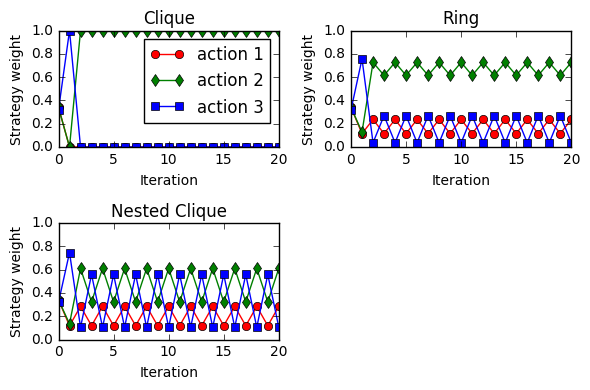

In [7]:
plt.figure
subplot(2,2,1)
plt.title("Clique")
plt.xlabel("Iteration")
plt.ylabel("Strategy weight")
plt.plot(range(iter_count+1), k_history[0], 'ro-', label="action 1")
plt.plot(range(iter_count+1), k_history[1], 'gd-', label="action 2")
plt.plot(range(iter_count+1), k_history[2], 'bs-', label="action 3")
plt.ylim(0,1)
plt.legend()
subplot(2,2,2)
plt.title("Ring")
plt.xlabel("Iteration")
plt.ylabel("Strategy weight")
plt.plot(range(iter_count+1), ring_history[0], 'ro-')
plt.plot(range(iter_count+1), ring_history[1], 'gd-')
plt.plot(range(iter_count+1), ring_history[2], 'bs-')
plt.ylim(0,1)
subplot(2,2,3)
plt.title("Nested Clique")
plt.xlabel("Iteration")
plt.ylabel("Strategy weight")
plt.plot(range(iter_count+1), nk_history[0], 'ro-')
plt.plot(range(iter_count+1), nk_history[1], 'gd-')
plt.plot(range(iter_count+1), nk_history[2], 'bs-')
plt.ylim(0,1)
plt.tight_layout()

## Expected strategy weights after convergence
For each network topology, the final weights of each strategy are averaged over 10 trials of 5 iterations each.
To account for the oscillator behavior seen above, I average the final _two_ states of each agent.

In [8]:
end_weight = {
    "k": np.zeros(shape=(3,)),
    "ring": np.zeros(shape=(3,)),
    "nk": np.zeros(shape=(3,))
}
for trial in range(10):
    clear_output()
    print "Trial: %d" % trial
    initial = sample_pure(1806, 3)
    # Clique
    states = {}
    for i, node in enumerate(net_k.nodes):
        states[node] = initial[i]
    k_history = learn(payoff, net_k, states, best_response, iter_count)
    end_weight["k"][0] += np.sum(k_history[0][-2:])
    end_weight["k"][1] += np.sum(k_history[1][-2:])
    end_weight["k"][2] += np.sum(k_history[2][-2:])
    # Ring
    states = {}
    for i, node in enumerate(net_ring.nodes):
        states[node] = initial[i]
    ring_history = learn(payoff, net_ring, states, best_response, iter_count)
    end_weight["ring"][0] += np.sum(ring_history[0][-2:])
    end_weight["ring"][1] += np.sum(ring_history[1][-2:])
    end_weight["ring"][2] += np.sum(ring_history[2][-2:])
    # Nested clique
    states = {}
    for i, node in enumerate(net_nk.nodes):
        states[node] = initial[i]
    nk_history = learn(payoff, net_nk, states, best_response, iter_count)
    end_weight["nk"][0] += np.sum(nk_history[0][-2:])
    end_weight["nk"][1] += np.sum(nk_history[1][-2:])
    end_weight["nk"][2] += np.sum(nk_history[2][-2:])
# Normalize
end_weight["k"] = end_weight["k"] / np.sum(end_weight["k"])
end_weight["ring"] = end_weight["ring"] / np.sum(end_weight["ring"])
end_weight["nk"] = end_weight["nk"] / np.sum(end_weight["nk"])
# Output results
clear_output()
print "Network        A1\tA2\tA3"
print "Clique         %0.3f\t%0.3f\t%0.3f" % tuple(end_weight["k"])
print "Ring           %0.3f\t%0.3f\t%0.3f" % tuple(end_weight["ring"])
print "Nested Clique  %0.3f\t%0.3f\t%0.3f" % tuple(end_weight["nk"])


Network        A1	A2	A3
Clique         0.000	1.000	0.000
Ring           0.189	0.647	0.164
Nested Clique  0.217	0.443	0.340


## Discussion
The clique immediately converges to action 2, as expected from the Golman-Page result for best-response dynamics.
In both the ring and the nested clique, action 2 is chosen by a large number of agents, but the other actions also remain present.
There appears to be an oscillation from action 3 to actions 1 and 2.
This is likely because action 3 has a large basin of attraction, but is unstable.

Over many trials with different initial strategies, the clique converges to action 2, while the ring and nested clique have weight on all actions.
Both of the other topologies have highest weight on action 2, but the ring favors action 1 next, while the nested clique favors action 3.

These results show two things. First, that basing best-response on limited knowl